In [4]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [5]:
""" copied from the tempelate """
def initShockTube(U):
    """sets up initial condition for the shock tube problem"""
    Unew = np.zeros_like(U)
    first = int(0.5 * N)
    # mass density rho
    Unew[:first, 0] = 1
    Unew[first:, 0] = 4
    # momentum density u
    Unew[:,1] = 0
    # defining E
    E = 0.5 * Unew[:,1] * (Unew[:,1]/Unew[:,0]) + Unew[:,0] * e
    Unew[:,2] = E

    return Unew


def initBlastWave(U):
    """sets up initial conditions for the blast wave problem"""
    Unew = np.zeros_like(U)
    # mass density rho
    Unew[:,0] = 1
    # momentum density u
    Unew[:,1] = 0
    # defining E
    E = 0.5 * Unew[:,1] * Unew[:,1]/Unew[:,0] + Unew[:,0] * e
    Unew[:,2] = E
    # adding one cell in the middle that has very large energy value of e = 1
    half = N//2
    Unew[half,2] = 0.5 * Unew[half,1] * (Unew[half,1]/Unew[half,0]) + Unew[half,0]

    return Unew

In [ ]:
def calculate_flux(U, e, gamma):
    """ calculates the flux using the formula from the lecture
        U = [p, pu, E] a vector
        F(U) = [pu, pu^2 + P, u(E + P)] = [pu, pu^2 + P, u * (0.5 * pu^2 + 3/2P)]
            where P = 2 * e * p -> e is a given constant

        using a loop takes on average: 136μs
        using advantage of numpy takes: 7.87μs
    """

    flux = np.zeros_like(U)

    p = U[:, 0]
    pu = U[:, 1]
    E = U[:, 2]
    u = pu / p
    P = (gamma - 1) * (E - 0.5 * p * u**2)

    flux[:, 0] = pu
    flux[:, 1] = p*u**2 + P
    flux[:, 2] = u * (0.5 * p*u**2 + 3/2 * P)

    return flux


# this does not generate the correct result
def method_a(U, delta_t, delta_x, e=1e-5, gamme=3):
    new_U = np.ones_like(U)
    flux = calculate_flux(U, e, gamma)
    new_U = 0.5 * (np.roll(U, -1, axis=0) + np.roll(U, 1, axis=0)) - ((delta_t)/(2 * delta_x))*(np.roll(flux, -1, axis=0) - np.roll(flux, 1, axis=0))
    
    return new_U

def method_b(U, delta_t, delta_x, e=1e-5, gamme=3):
    flux_i_minus_half, flux_i_plus_half = riemann_solver(U)
    new_U = U - (delta_t / delta_x) * (flux_i_plus_half - flux_i_minus_half)

    return new_U
    

def method_c(U):
    temp_U = np.zeros_like(U)
    new_U = np.zeros_like(U)

    """ calculating the temporary step """
    flux_i_minus_half, flux_i_plus_half = riemann_solver(U)
    temp_U = U - (delta_t / 2 * delta_x) * (flux_i_plus_half - flux_i_minus_half)

    """ calculating the actuall step """
    flux_i_minus_half, flux_i_plus_half = riemann_solver(temp_U)
    new_U = U - (delta_t / delta_x) * (flux_i_plus_half - flux_i_minus_half)

    return new_U

def riemann_solver(U):
    """
    Lax-Friedrichs Riemann Solver implementation according the the lecture notes
    uses the following formula:

    F_{i-0.5} = 0.5 * (F_i + F_{i-1}) - 0.5 * D_max * [U_i, U_{i-1}]

    args:
        U: the grid
    returns:
        (F_{i - 0.5}, F_{i + 0.5}) -> both grid in same type as U
    """

    flux = calculate_flux(U, e, gamma)
    p = U[:, 0]
    pu = U[:, 1]
    E = U[:, 2]
    u = pu / p
    P = (gamma - 1) * (E - 0.5 * p * u**2)

    D_max = np.abs(u) + np.sqrt(np.abs(gamma * P / p))
    D_max_shape = np.repeat(D_max, 3).reshape(len(D_max), 3)

    flux_i_minus_half = 0.5 * (flux + np.roll(flux, 1, axis=0)) - 0.5 * D_max_shape * (U - np.roll(U, 1, axis=0))
    flux_i_plus_half = 0.5 * (np.roll(flux, -1, axis=0) + flux) - 0.5 * D_max_shape * (np.roll(U, -1, axis=0) - U)

    return flux_i_minus_half, flux_i_plus_half

In [7]:
# size of the grd in one dimension
N = 100

# Definition of the state vector
# in every grid cell, [mass density, momentum density, energy density]
U = np.zeros((N, 3))
e = 1e-5

# gamme value for the 1 dimensional problem
gamma = 3

# defines the time step, must obey the Courant Condition
delta_x = 100.0 / N
delta_t = round(0.2 * delta_x, 12)
tEnd = 1000

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900
4950


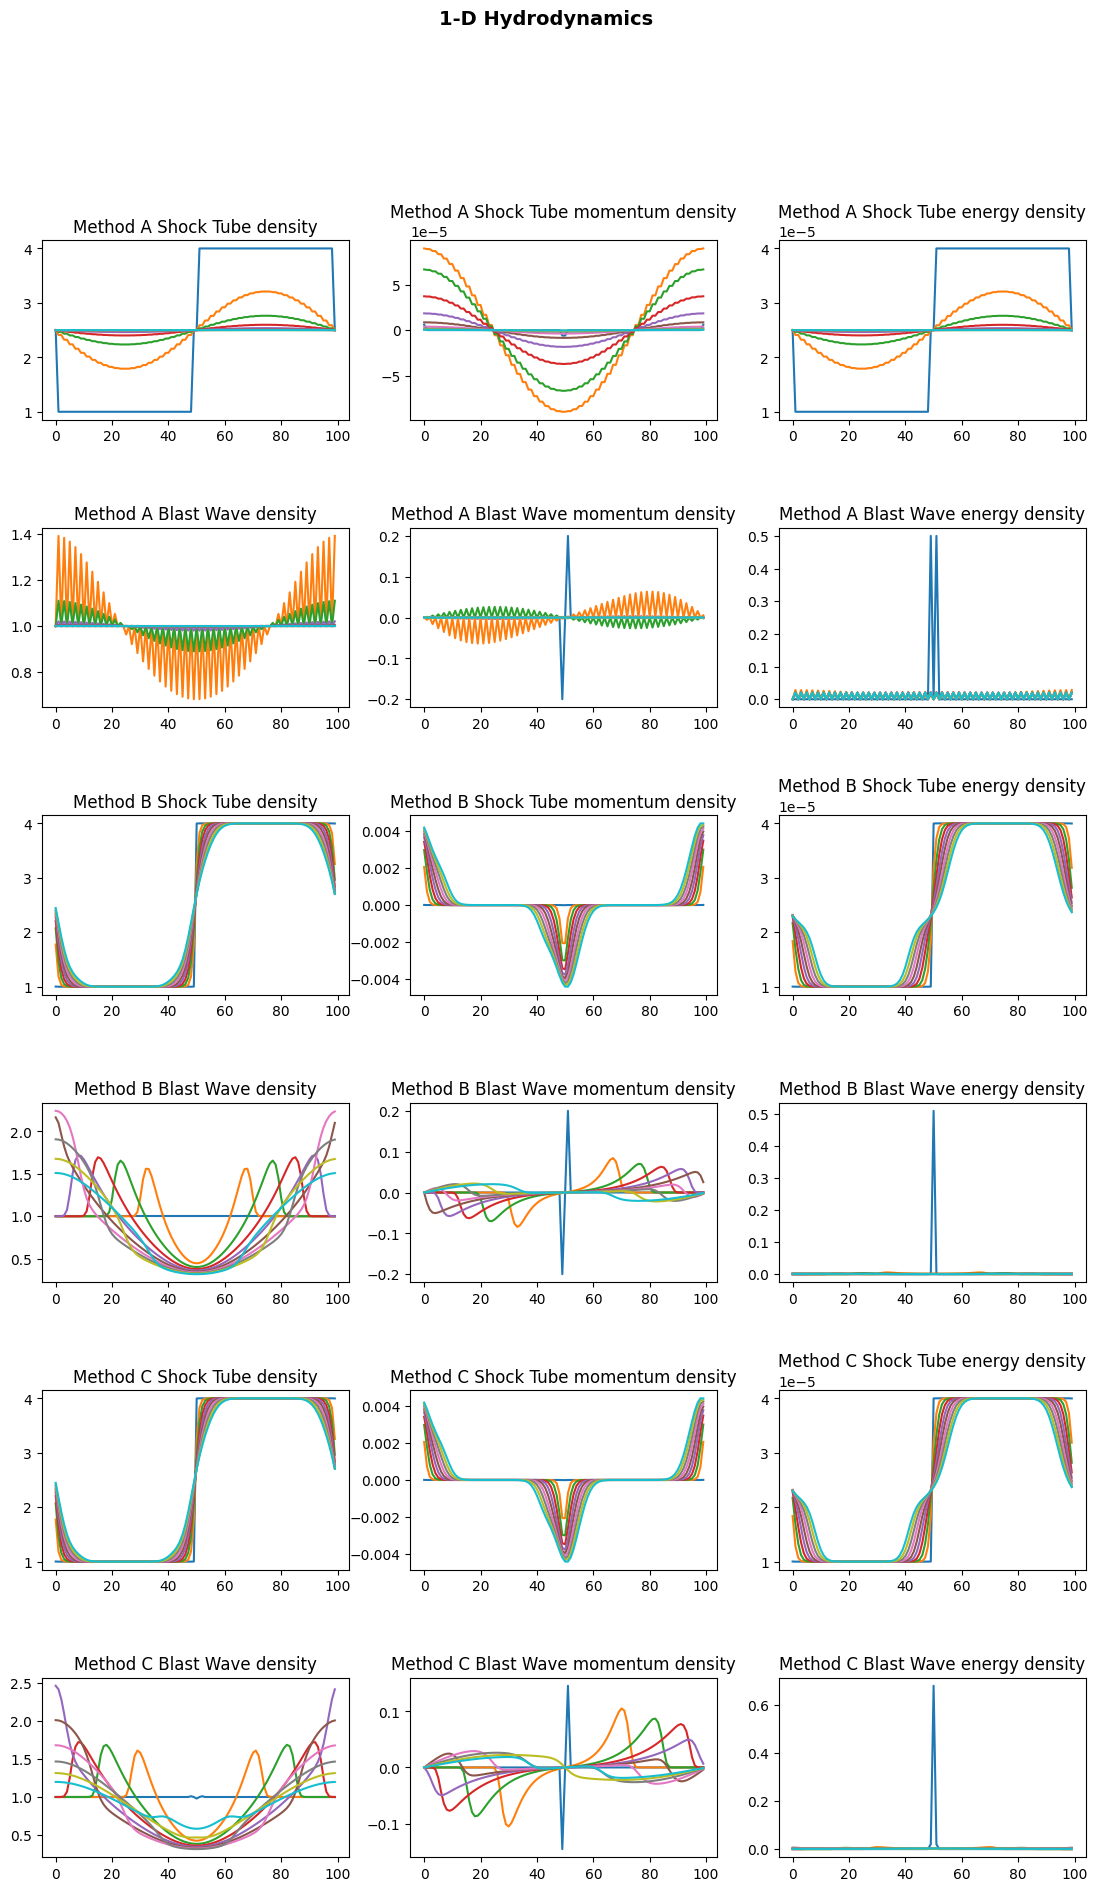

In [8]:
"""Plotting the stuff -> copied from tempelate"""


# defining the six initial conditions for the six plots
UShockA = initShockTube(U)
UShockB = initShockTube(U)
UShockC = initShockTube(U)
UBlastA = initBlastWave(U)
UBlastB = initBlastWave(U)
UBlastC = initBlastWave(U)



fig, ax = plt.subplots(6, 3, figsize=(12, 21))
fig.subplots_adjust(left=0.08, right=0.95, bottom=0.1, top=0.87, wspace=0.2, hspace=0.6)
plt.suptitle("1-D Hydrodynamics", fontweight="bold", fontsize=14)

#method A plots
plot1 = ax[0][0]
plot2 = ax[0][1]
plot3 = ax[0][2]
plot4 = ax[1][0]
plot5 = ax[1][1]
plot6 = ax[1][2]

#method B plots
plot7 = ax[2][0]
plot8 = ax[2][1]
plot9 = ax[2][2]
plot10 = ax[3][0]
plot11 = ax[3][1]
plot12 = ax[3][2]

#method C plots
plot13 = ax[4][0]
plot14 = ax[4][1]
plot15 = ax[4][2]
plot16 = ax[5][0]
plot17 = ax[5][1]
plot18 = ax[5][2]


plot1.set_title("Method A Shock Tube density")
plot4.set_title("Method A Blast Wave density")
plot2.set_title("Method A Shock Tube momentum density")
plot5.set_title("Method A Blast Wave momentum density")
plot3.set_title("Method A Shock Tube energy density")
plot6.set_title("Method A Blast Wave energy density")

plot7.set_title("Method B Shock Tube density")
plot10.set_title("Method B Blast Wave density")
plot8.set_title("Method B Shock Tube momentum density")
plot11.set_title("Method B Blast Wave momentum density")
plot9.set_title("Method B Shock Tube energy density")
plot12.set_title("Method B Blast Wave energy density")

plot13.set_title("Method C Shock Tube density")
plot16.set_title("Method C Blast Wave density")
plot14.set_title("Method C Shock Tube momentum density")
plot17.set_title("Method C Blast Wave momentum density")
plot15.set_title("Method C Shock Tube energy density")
plot18.set_title("Method C Blast Wave energy density")

for n in range(int(tEnd/delta_t)):
    if n % (int(tEnd/delta_t/100.0)) == 0:
        print(n)
    UShockA = method_a(UShockA, delta_t, delta_x)
    UBlastA = method_a(UBlastA, delta_t, delta_x)
    UShockB = method_b(UShockB, delta_t, delta_x)
    UBlastB = method_b(UBlastB, delta_t, delta_x)
    UShockC = method_c(UShockC)
    UBlastC = method_c(UBlastC)
    if n % (int(tEnd/delta_t/10)) == 0:
        plot1.plot(UShockA[:,0])
        plot4.plot(UBlastA[:,0])
        plot2.plot(UShockA[:,1])
        plot5.plot(UBlastA[:,1])
        plot3.plot(UShockA[:,2])
        plot6.plot(UBlastA[:,2])
        
        plot7.plot(UShockB[:,0])
        plot10.plot(UBlastB[:,0])
        plot8.plot(UShockB[:,1])
        plot11.plot(UBlastB[:,1])
        plot9.plot(UShockB[:,2])
        plot12.plot(UBlastB[:,2])
        
        plot13.plot(UShockC[:,0])
        plot16.plot(UBlastC[:,0])
        plot14.plot(UShockC[:,1])
        plot17.plot(UBlastC[:,1])
        plot15.plot(UShockC[:,2])
        plot18.plot(UBlastC[:,2])

plt.savefig("result.png",dpi=350)
#plt.show()
